<a href="https://colab.research.google.com/github/Indian1999/szombatmi/blob/main/DBSCANclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, cluster
import scipy
import geopy
import folium

In [30]:
city = "Dubai"
dtf = pd.read_csv("directory.csv")
dtf = dtf[dtf["City"] == city]
dtf = dtf[["City","Street Address", "Longitude", "Latitude"]]
dtf.head()

,City,Street Address,Longitude,Latitude
55,Dubai,"Jumeirah, Near Spinney's",55.23,25.17
56,Dubai,"Reel Cinema, Dubai Mall, Second Floor",55.60,24.78
57,Dubai,"Dubai Airport Rd, Terminal 3",55.35,25.25
58,Dubai,"Safa Street, Jumeirah 1, Jumeirah District",55.31,25.27
59,Dubai,DIFC Building No. 5,55.16,25.10


In [31]:
dtf["Potential"] = np.random.randint(low=3, high = 11, size=len(dtf))
dtf["Staff"] = dtf["Potential"].apply(lambda x: int(np.random.rand()*x) + 1)
dtf["Capacity"] = dtf["Potential"] - dtf["Staff"]
dtf["Cost"] = np.random.choice(["high", "medium", "low"], size=len(dtf), p=[0.4, 0.5, 0.1])
dtf.head()

,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost
55,Dubai,"Jumeirah, Near Spinney's",55.23,25.17,8,2,6,medium
56,Dubai,"Reel Cinema, Dubai Mall, Second Floor",55.60,24.78,8,2,6,high
57,Dubai,"Dubai Airport Rd, Terminal 3",55.35,25.25,9,4,5,medium
58,Dubai,"Safa Street, Jumeirah 1, Jumeirah District",55.31,25.27,6,1,5,medium
59,Dubai,DIFC Building No. 5,55.16,25.10,5,4,1,low


In [32]:
#Határozzuk meg a város koordinátáit:
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
location = [location.latitude, location.longitude]
print(location)

دبي, الإمارات العربية المتحدة
[25.2653471, 55.2924914]


In [33]:
colors = []
for i in dtf["Cost"]:
  if i == "high":
    colors.append("red")
  if i == "medium":
    colors.append("orange")
  if i == "low":
    colors.append("green")
dtf["Color"] = colors
dtf.head()

,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,Color
55,Dubai,"Jumeirah, Near Spinney's",55.23,25.17,8,2,6,medium,orange
56,Dubai,"Reel Cinema, Dubai Mall, Second Floor",55.60,24.78,8,2,6,high,red
57,Dubai,"Dubai Airport Rd, Terminal 3",55.35,25.25,9,4,5,medium,orange
58,Dubai,"Safa Street, Jumeirah 1, Jumeirah District",55.31,25.27,6,1,5,medium,orange
59,Dubai,DIFC Building No. 5,55.16,25.10,5,4,1,low,green


In [34]:
map = folium.Map(location=location, tiles="cartodb positron")
dtf.apply(lambda row: folium.CircleMarker(
    location=[row["Latitude"], row["Longitude"]],
    popup=row["Street Address"],
    color=row["Color"],
    fill = True,
    radius = row["Staff"]).add_to(map), axis=1
)
map

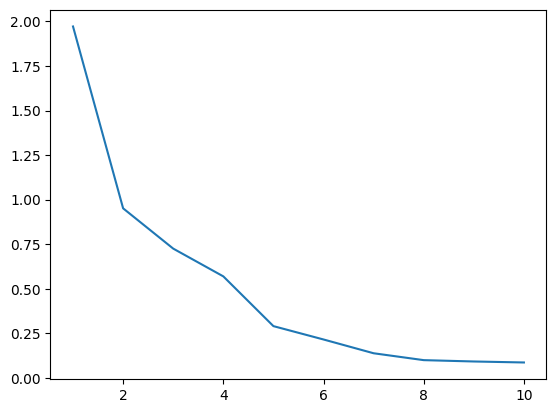

In [35]:
coords = dtf[["Latitude", "Longitude"]]
distortions = []
for i in range(1,11):
  model = cluster.KMeans(n_clusters=i, random_state=0, n_init="auto")
  model.fit(coords)
  distortions.append(model.inertia_)

plt.plot(range(1,11), distortions)
plt.show()

In [36]:
model = cluster.KMeans(n_clusters = 5, n_init="auto")
dtf["Cluster Kmeans"] = model.fit_predict(coords)
centers = model.cluster_centers_
print(centers)
dtf.head()

[[25.18958333 55.29166667]
 [25.07793103 55.15137931]
 [24.54       55.        ]
 [24.78       55.6       ]
 [25.25391304 55.34956522]]


,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,Color,Cluster Kmeans
55,Dubai,"Jumeirah, Near Spinney's",55.23,25.17,8,2,6,medium,orange,0
56,Dubai,"Reel Cinema, Dubai Mall, Second Floor",55.60,24.78,8,2,6,high,red,3
57,Dubai,"Dubai Airport Rd, Terminal 3",55.35,25.25,9,4,5,medium,orange,4
58,Dubai,"Safa Street, Jumeirah 1, Jumeirah District",55.31,25.27,6,1,5,medium,orange,4
59,Dubai,DIFC Building No. 5,55.16,25.10,5,4,1,low,green,1


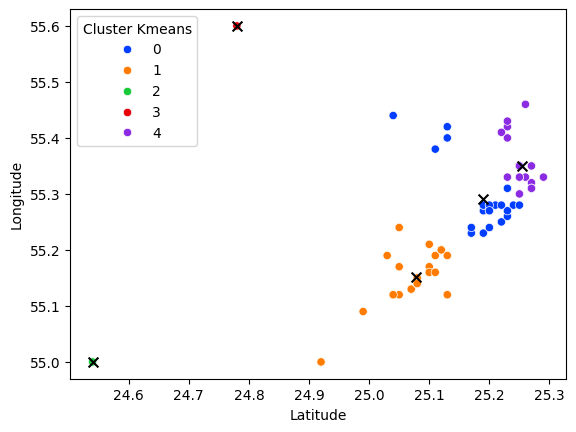

In [37]:
fig, ax = plt.subplots()
sns.scatterplot(x="Latitude", y="Longitude", data=dtf,
                palette=sns.color_palette("bright", 5),
                hue = "Cluster Kmeans", legend = "brief", ax=ax
                )
ax.scatter(centers[:,0], centers[:, 1], s = 50, c = "black", marker="x")

In [38]:
dtf = dtf.sort_values(by = ["Cluster Kmeans"])
dtf.head()

,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,Color,Cluster Kmeans
55,Dubai,"Jumeirah, Near Spinney's",55.23,25.17,8,2,6,medium,orange,0
81,Dubai,"Building 4, Ground Floor",55.27,25.20,5,3,2,medium,orange,0
77,Dubai,Jumeira Road,55.25,25.22,8,3,5,medium,orange,0
76,Dubai,"Al Mehemal Street, Jumeirah 2",55.23,25.19,10,1,9,high,red,0
110,Dubai,"Shaikh Zayed Road (In front of DIFC), Ground F...",55.28,25.22,3,2,1,high,red,0


In [39]:
#határozzuk meg, hogy mely boltok vannak a klasztereik közepéhez legközelebb
kmeans_centers = []
for k in range(5):
  min_distance = float("inf") #végtelen
  for i in range(len(dtf["Cluster Kmeans"])):
    if dtf.iloc[i, 9] == k:
      distance = np.sqrt((centers[k,0] - dtf.iloc[i,3])**2 + (centers[k,1] - dtf.iloc[i,4])**2)
      if distance < min_distance:
        min_distance = distance
        min_place = i
  kmeans_centers.append(min_place)
print(kmeans_centers)

[3, 31, 53, 54, 63]


In [40]:
kmeans_iscentroid = []
for i in range(len(dtf)):
  if i not in kmeans_centers:
    kmeans_iscentroid.append(0)
  else:
    kmeans_iscentroid.append(1)
dtf["Kmeans Iscentroid"] = kmeans_iscentroid
dtf.head()

,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,Color,Cluster Kmeans,Kmeans Iscentroid
55,Dubai,"Jumeirah, Near Spinney's",55.23,25.17,8,2,6,medium,orange,0,0
81,Dubai,"Building 4, Ground Floor",55.27,25.20,5,3,2,medium,orange,0,0
77,Dubai,Jumeira Road,55.25,25.22,8,3,5,medium,orange,0,0
76,Dubai,"Al Mehemal Street, Jumeirah 2",55.23,25.19,10,1,9,high,red,0,1
110,Dubai,"Shaikh Zayed Road (In front of DIFC), Ground F...",55.28,25.22,3,2,1,high,red,0,0


In [41]:
x,y ="Latitude", "Longitude"
color = "Colors Kmeans"
popup = "Street Address"
marker = centers[:,0]
colors = ["#0000FF", "#FFA500", "#00FF00", "#FF0000", "#800080"]
colors_kmeans = []
for i in dtf["Cluster Kmeans"]:
  colors_kmeans.append(colors[i])
dtf["Colors Kmeans"] = colors_kmeans
dtf.head()

,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,Color,Cluster Kmeans,Kmeans Iscentroid,Colors Kmeans
55,Dubai,"Jumeirah, Near Spinney's",55.23,25.17,8,2,6,medium,orange,0,0,#0000FF
81,Dubai,"Building 4, Ground Floor",55.27,25.20,5,3,2,medium,orange,0,0,#0000FF
77,Dubai,Jumeira Road,55.25,25.22,8,3,5,medium,orange,0,0,#0000FF
76,Dubai,"Al Mehemal Street, Jumeirah 2",55.23,25.19,10,1,9,high,red,0,1,#0000FF
110,Dubai,"Shaikh Zayed Road (In front of DIFC), Ground F...",55.28,25.22,3,2,1,high,red,0,0,#0000FF


In [ ]:
map = folium.Map(location = location, tiles = "OpenStreetMap", zoom_start=11)
dtf.apply(lambda row: folium.CircleMarker(
    location=[row[x], row[y]], popup=row[popup], color = row["Colors Kmeans"], fill = True, radius=row["Staff"]).add_to(map), axis = 1
)
dtf[dtf["Kmeans Iscentroid"] == 1].apply(lambda row: folium.Marker(
    location=[row[x], row[y]], popup=row[popup], icon=folium.Icon(color="black")).add_to(map), axis = 1
)
map

In [59]:
from sklearn.cluster import DBSCAN

X = dtf[["Latitude", "Longitude"]]
dbscan = DBSCAN(eps=0.03, min_samples=3).fit(X)
labels_dbscan = dbscan.labels_
print(labels_dbscan)

[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  0
  2  2  2 -1  2  2  2  2  2  2  2 -1  2  2 -1  2  2  2  2 -1  2  2  2 -1
  2  2 -1  2 -1 -1 -1  0  0  0  0  0  0 -1  0  0  0  3  3  0  3  0  0  0
  0  0  0  0  3  0]


In [ ]:
plt.scatter(X["Longitude"],X["Latitude"], c=labels_dbscan)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters with DBSCAN")
plt.show()